In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import string
string.punctuation
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [5]:
en_stopwords = nltk.corpus.stopwords.words('english')
wordLem = WordNetLemmatizer()

In [24]:
Amazon_review = pd.read_csv('./amazon.csv')
Amazon_review = Amazon_review.iloc[:,1:]
Amazon_review.head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [25]:
Amazon_review['overall'].value_counts()

5    3922
4     527
1     244
3     142
2      80
Name: overall, dtype: int64

In [39]:
Amazon_review.shape

(4915, 11)

In [41]:
Amazon_review = Amazon_review.dropna()

In [42]:
Amazon_review.shape

(4913, 11)

In [31]:
Amazon_review[Amazon_review['overall']==1].iloc[1,:]['reviewText']

'I bougth this micro SD card after some trubles with other that i got from Kingston, i can tell that SanDisk is other quality, this is the best, my i9300 phone can read a 64GB very fast, the dta transfer speed from my pc to my is amazing, if you are looking for additional storage to you phone, for music, pictures and other type of files, this is for you.Pros-Very good quality materials of construction-Amazing speedUpdate after one year this memory is damaged I can not delete or put new files on it, I can not format this memory, I tried to format with my phone, with my pc, with a camera and nothing, now this is like a 64gb cd, the data in the memory is only available to read but I can not move, or delete it, I bought this memory to be used to backup all my data of my android device but now is only a readable memory I can not write data on it any more, I hope sandisk make a better products in the future!!! Total disagree I will buy a Samsung memory card expected a better quality.'

In [50]:
def assign_class(reviews):
    if int(reviews)==1 or int(reviews)==2:
        return 0
    elif int(reviews)==5 or int(reviews)==4:
        return 2
    else:
        return 1
    

In [51]:
%%time
Amazon_review['Sentiment'] = Amazon_review['overall'].apply(lambda x:assign_class(x))

CPU times: total: 0 ns
Wall time: 8.97 ms


In [52]:
Amazon_review

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Sentiment
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0,2
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0,2
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0,2
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0,2
5,2Cents!,5,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0,0
4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0,2
4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0,2
4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0,2


In [60]:
Dataset = Amazon_review.loc[:,['Sentiment','reviewText']]
Dataset.sample(5)

,Sentiment,reviewText
1590,2,"Plenty of room for all my photos, music and ra..."
3351,2,The best MicroSD card around for shooting with...
2771,2,I bought a SanDisk SSD for my computer. It's ...
3252,2,Very good product!!! Comes with an adaptor to...
3792,2,Took out my old card a black one from Kingston...


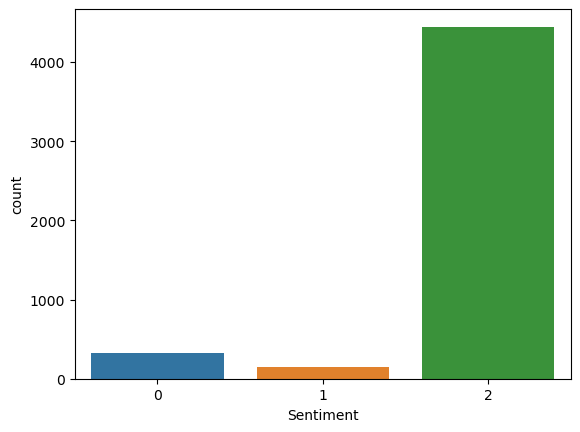

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(Dataset,x="Sentiment")
plt.show()

In [74]:
def clean_reviews(reviews):
    reviews = "".join([word.lower() for word in reviews if word not in string.punctuation])
    reviews = re.split("\W+",reviews)
    reviews = [wordLem.lemmatize(word) for word in reviews if word not in en_stopwords]
    
    reviews = " ".join(reviews)
    
    return reviews

In [75]:
%%time
Dataset['reviews_cleaned'] = Dataset.reviewText.apply(lambda x: clean_reviews(x))

CPU times: total: 2.23 s
Wall time: 2.5 s


In [77]:
Dataset.head(5)

,Sentiment,reviewText,reviews_cleaned
1,2,"Purchased this for my device, it worked as adv...",purchased device worked advertised never much ...
2,2,it works as expected. I should have sprung for...,work expected sprung higher capacity think mad...
3,2,This think has worked out great.Had a diff. br...,think worked greathad diff bran 64gb card went...
4,2,"Bought it with Retail Packaging, arrived legit...",bought retail packaging arrived legit orange e...
5,2,It's mini storage. It doesn't do anything els...,mini storage doesnt anything else supposed pur...


### Vectorization using tf-idf technique

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer(ngram_range=(2,2))

In [80]:
X = Dataset['reviews_cleaned']
Y = Dataset['Sentiment']

In [81]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,random_state=42,stratify=Y)